In [20]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [14]:
#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [21]:
# Functions
def plot_ssh(ds, nt, vmin=-0.3, vmax=0.3):
    W1 = ds['ETAN'][nt,:,:]
    W2 = ds['ETAN'][nt+2,:,:]
    W3 = ds['ETAN'][nt+4,:,:]
    W4 = ds['ETAN'][nt+6,:,:]
    W5 = ds['ETAN'][nt+8,:,:]
    W6 = ds['ETAN'][nt+10,:,:]
   
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,11), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
    ax3.set_facecolor('tan')
    ax4.set_facecolor('tan')
    ax5.set_facecolor('tan')

    pc = ax0.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax0.contour(LON,LAT, np.ma.masked_array(np.squeeze(W1*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax0.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax1.contour(LON,LAT, np.ma.masked_array(np.squeeze(W2*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax1.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax2.contour(LON,LAT, np.ma.masked_array(np.squeeze(W3*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax2.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax3.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax3.contour(LON,LAT, np.ma.masked_array(np.squeeze(W4*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax3.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax4.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax4.contour(LON,LAT, np.ma.masked_array(np.squeeze(W5*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax4.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax5.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=vmin, vmax=vmax)
    ax5.contour(LON,LAT, np.ma.masked_array(np.squeeze(W6*100),mask=mask[0,:,:]),levels=[0], colors='0.5')
    ax5.contour(LON,LAT,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    ax3.set_xlabel('Lon')
    ax4.set_xlabel('Lon')
    ax5.set_xlabel('Lon')
    ax0.set_ylabel('Lat')
    ax3.set_ylabel('Lat')

    ax0.set_title(r'$\eta$ at %1.2f h'%(time[nt]/3600))
    ax1.set_title(r'$\eta$ at %1.2f h'%(time[nt+2]/3600))
    ax2.set_title(r'$\eta$ at %1.2f h'%(time[nt+4]/3600))
    ax3.set_title(r'$\eta$ at %1.2f h'%(time[nt+6]/3600))
    ax4.set_title(r'$\eta$ at %1.2f h'%(time[nt+8]/3600))
    ax5.set_title(r'$\eta$ at %1.2f h'%(time[nt+10]/3600))
    
    ax0.set_xlim(-121,-114)
    ax0.set_ylim(27,35)
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2,ax3,ax4,ax5)

# ---------------------------------------------------------------------------
def plot_ssh_filt(nt, ssh_filt):
    fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(15,11), sharey=True, sharex=True)
    ax0.set_facecolor('tan')
    ax1.set_facecolor('tan')
    ax2.set_facecolor('tan')
    ax3.set_facecolor('tan')
    ax4.set_facecolor('tan')
    ax5.set_facecolor('tan')

    pc = ax0.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt,:,:]*100),mask=mask[0,:,:]),
                       cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax0.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax0.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax1.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+1,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax1.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+1,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax1.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax2.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+2,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax2.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+2,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax2.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax3.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+3,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax3.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+3,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax3.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax4.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+4,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax4.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+4,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax4.contour(LON,LAT,depth, levels=[0,250], colors='k')

    pc = ax5.pcolormesh(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+5,:,:]*100),mask=mask[0,:,:]),
                      cmap=cmo.cm.delta, vmin=-0.2, vmax=0.2)
    ax5.contour(LON,LAT, np.ma.masked_array(np.squeeze(ssh_filt[nt+5,:,:]*100),mask=mask[0,:,:]),
                levels=[0], colors='0.5')
    ax5.contour(LON,LAT,depth, levels=[0,250], colors='k')

    norm = mpl.colors.Normalize(vmin=-0.2, vmax=0.2)
    cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
    cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.delta),
                      cax=cbar_ax, orientation='vertical',label='cm')
    
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        # ssh transects
        for ii in range(len(lon_inds)):
            ax.plot(lon[lon_inds[ii]],lat[lat_inds[ii]],'ro', markersize=4)

    ax3.set_xlabel('Lon')
    ax4.set_xlabel('Lon')
    ax5.set_xlabel('Lon')
    ax0.set_ylabel('Lat')
    ax3.set_ylabel('Lat')

    ax0.set_title(r'Filtered $\eta$ at %1.2f h'%(time[nt]/3600))
    ax1.set_title(r'%1.2f h'%(time[nt+1]/3600))
    ax2.set_title(r'%1.2f h'%(time[nt+2]/3600))
    ax3.set_title(r'%1.2f h'%(time[nt+3]/3600))
    ax4.set_title(r'%1.2f h'%(time[nt+4]/3600))
    ax5.set_title(r'%1.2f h'%(time[nt+5]/3600))
   
    ax0.set_xlim(-121,-114)
    ax0.set_ylim(27,35)
    for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
        ax.set_aspect(1)
    return(fig,ax0,ax1,ax2,ax3,ax4,ax5)

In [46]:
outdir = '/data/SO2/sio-kramosmusalem/12_globalwinds_noSVB_barotropic_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [47]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,144)*600

### SSH 
* 10 min averages
* Black: 0 and 250 m depth contours
* Grey: 0 m ssh 

In [48]:
(12*3600)/600

72.0

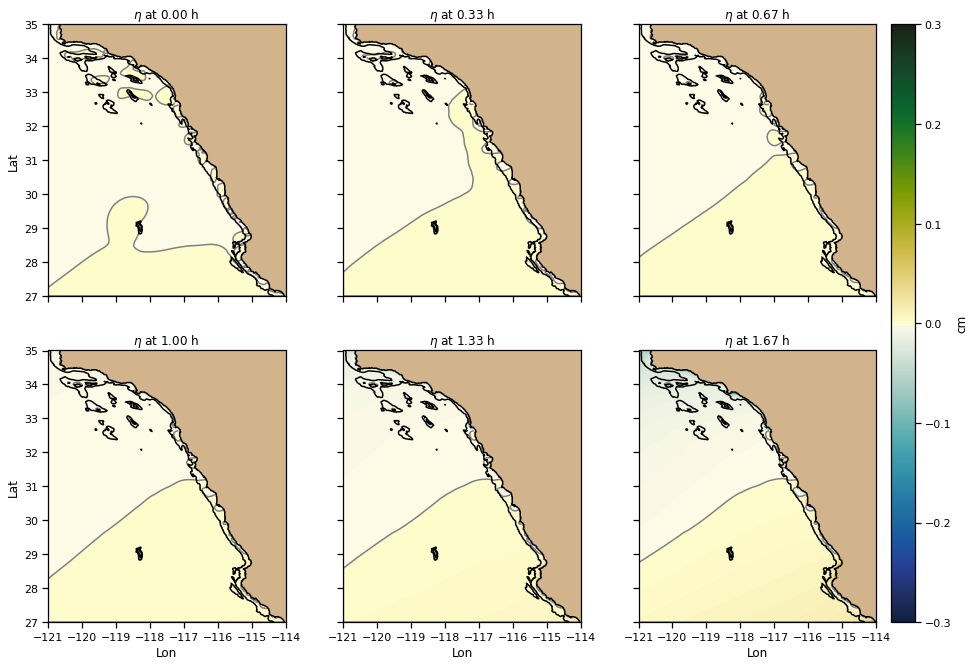

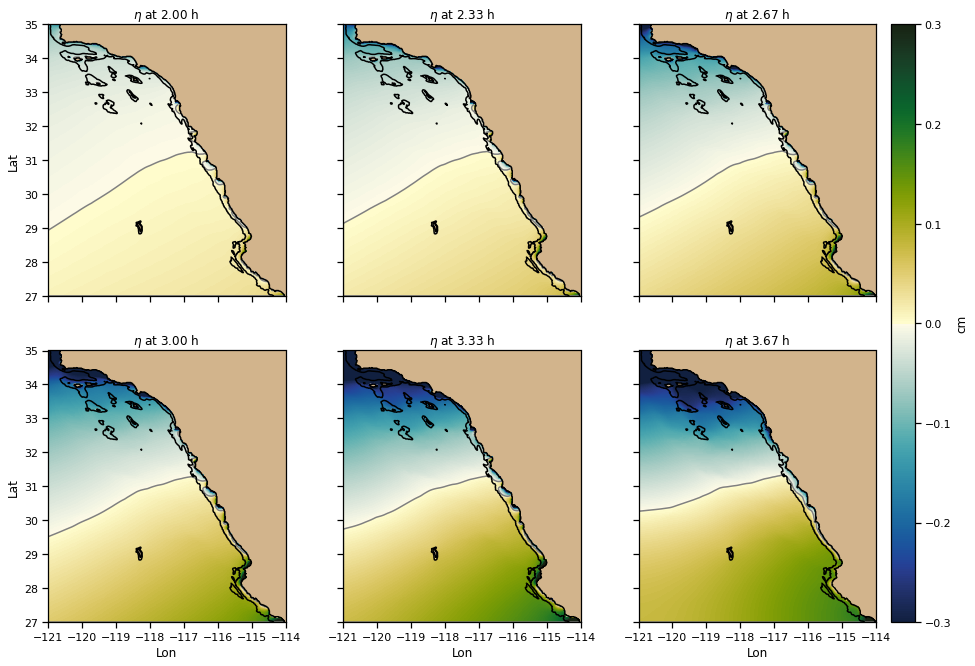

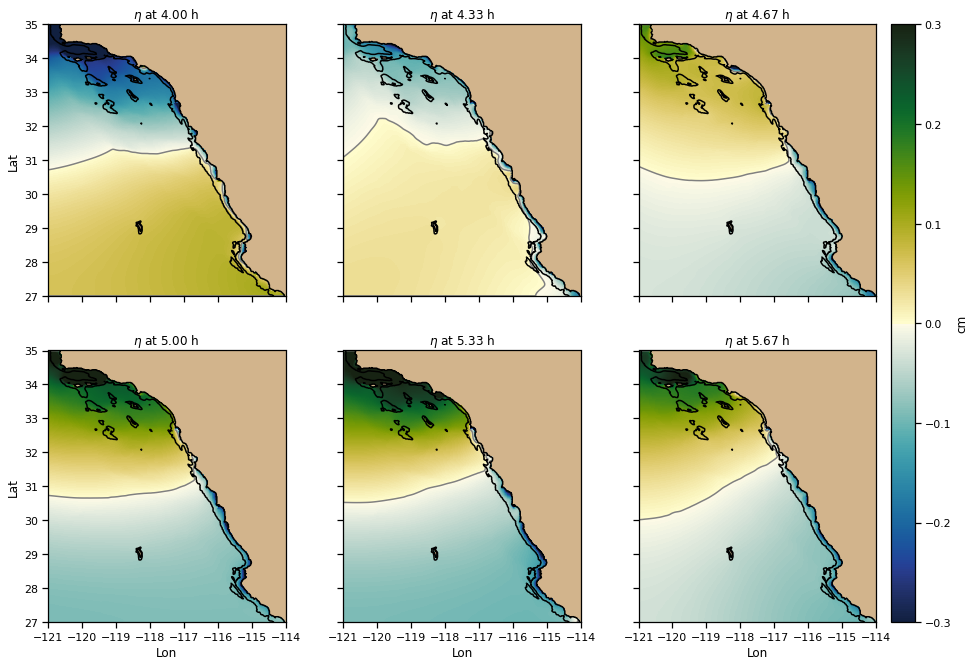

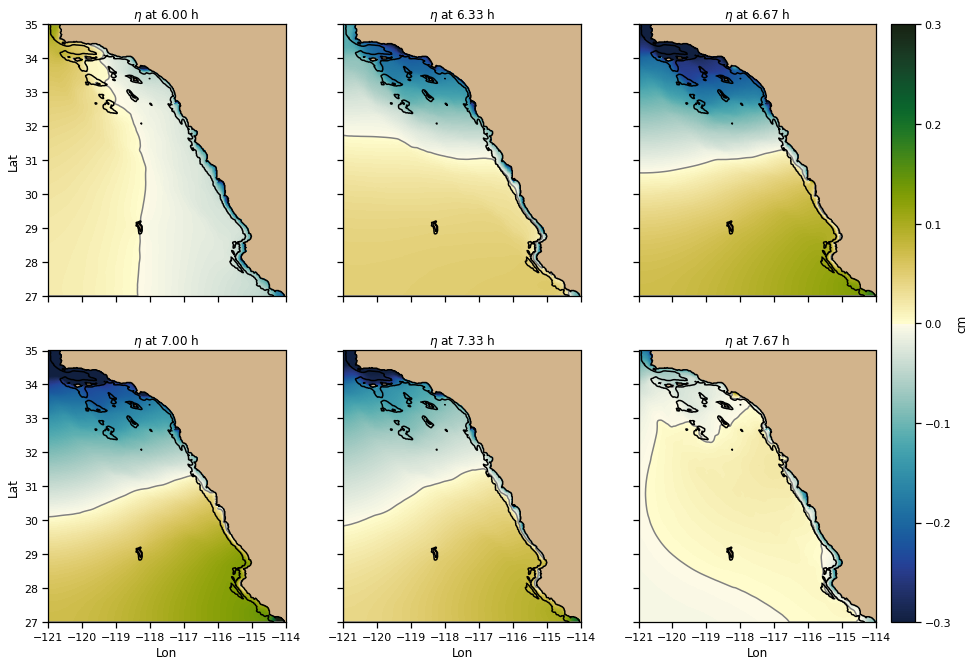

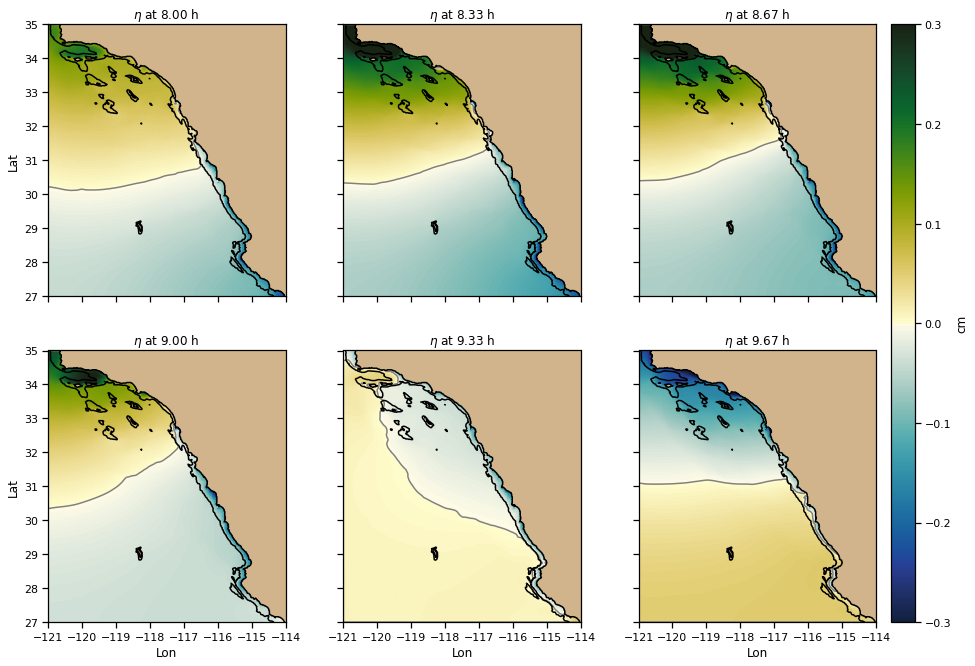

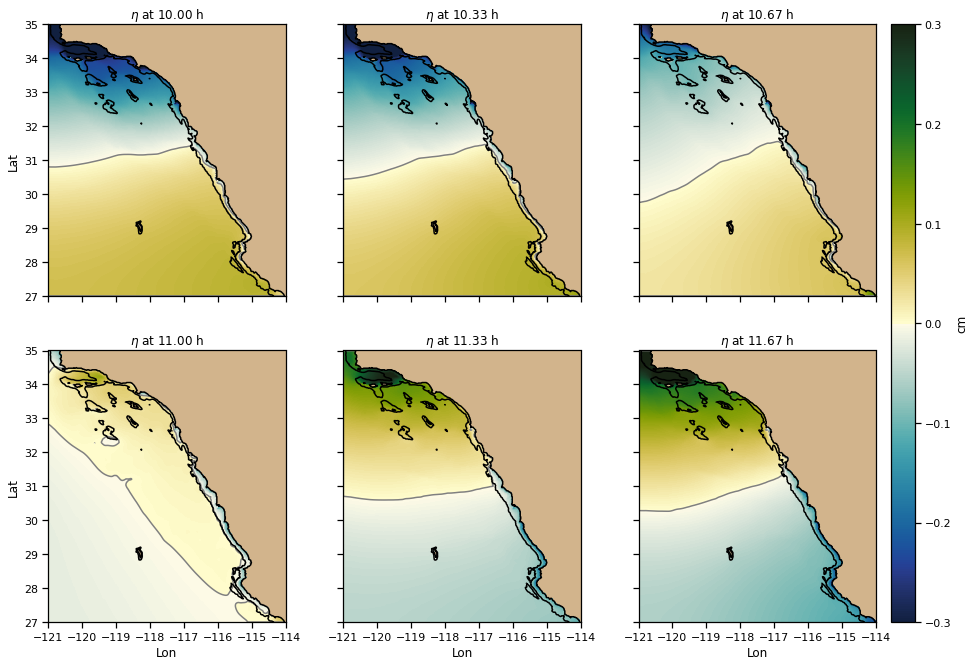

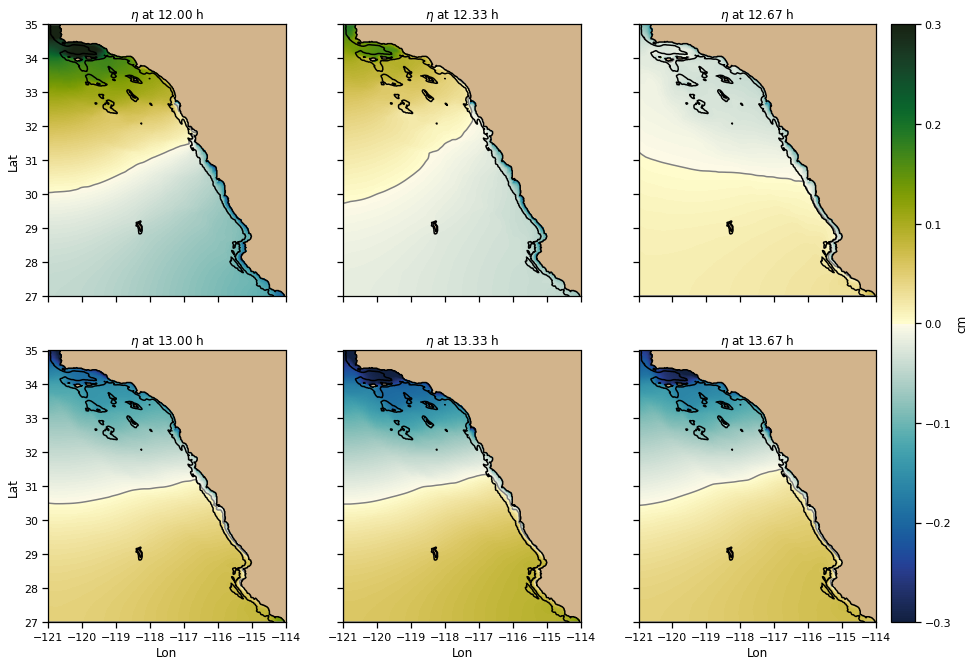

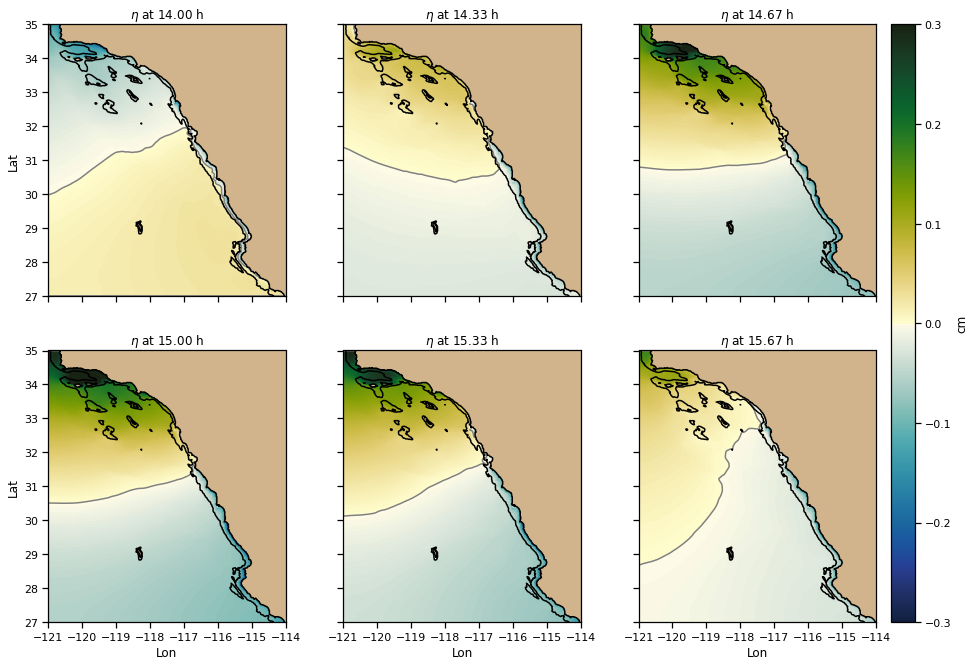

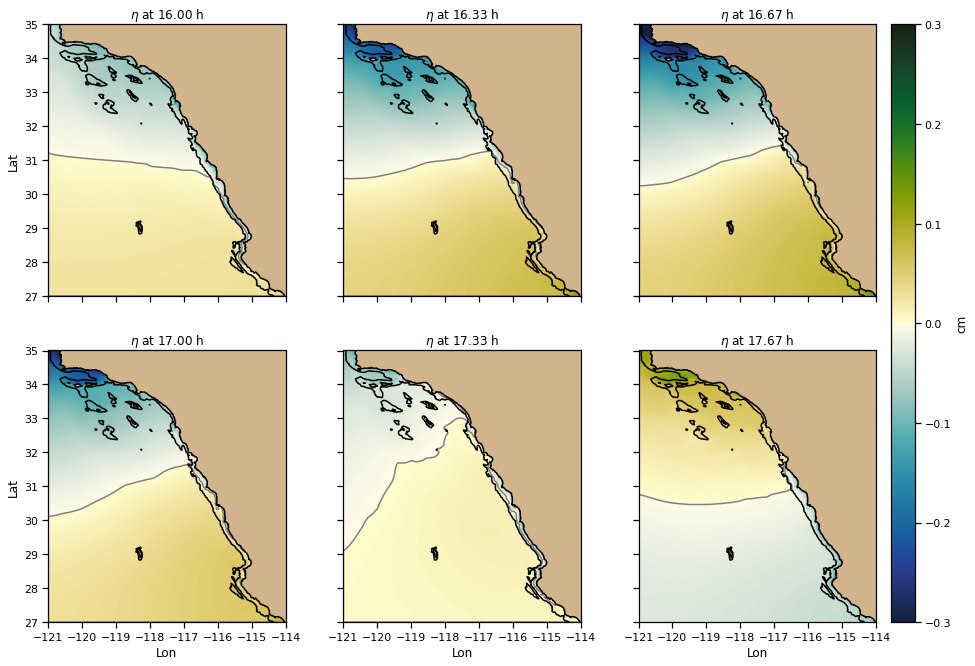

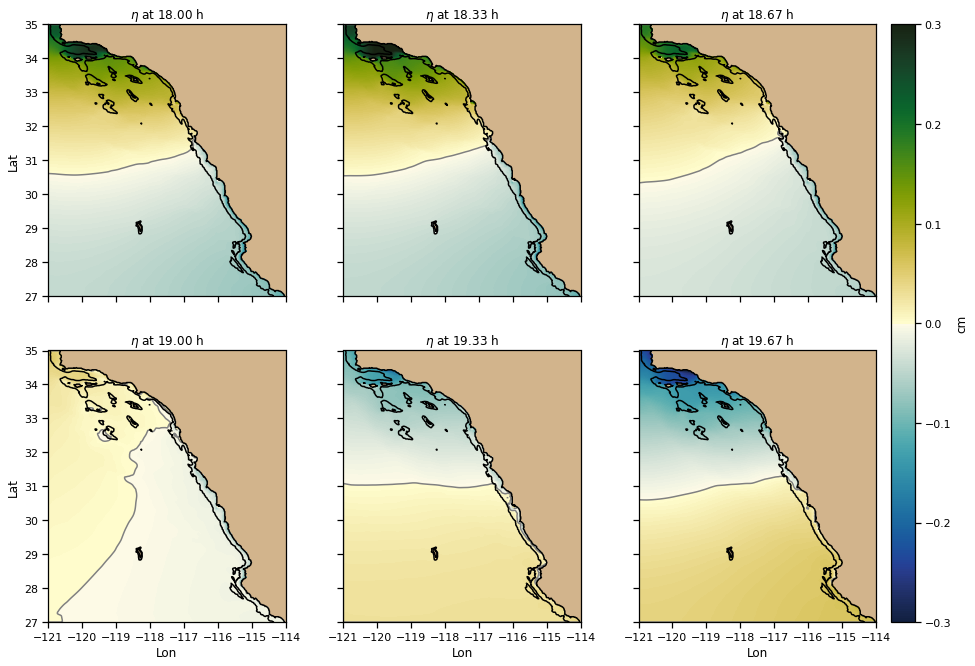

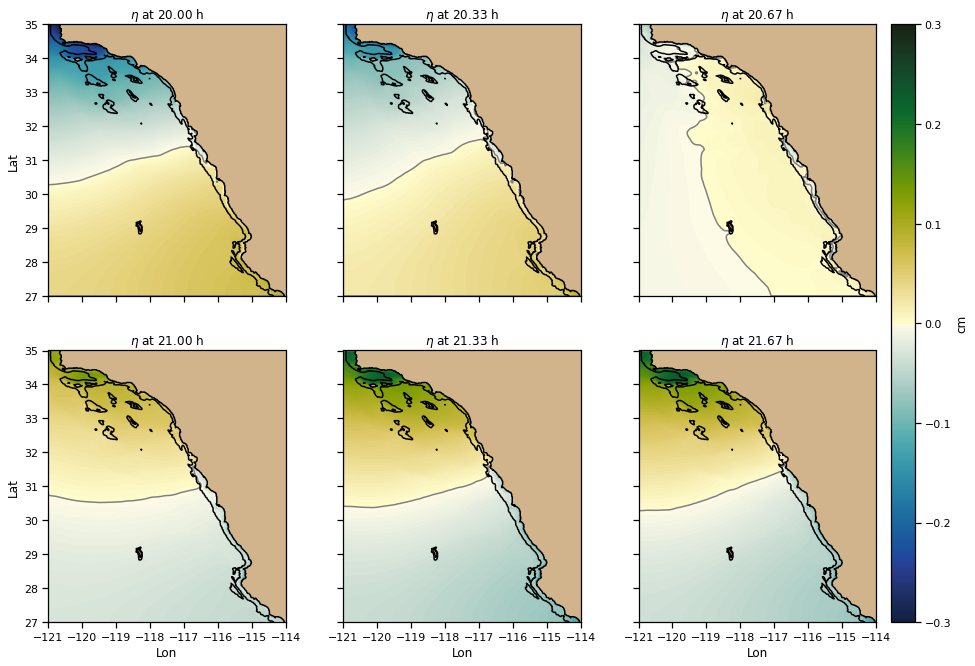

In [50]:
sns.set_context('notebook')
for nt in range(0,132,12):
    fig,ax0,ax1,ax2,ax3,ax4,ax5 = plot_ssh(ds,nt)

### vertical velocity

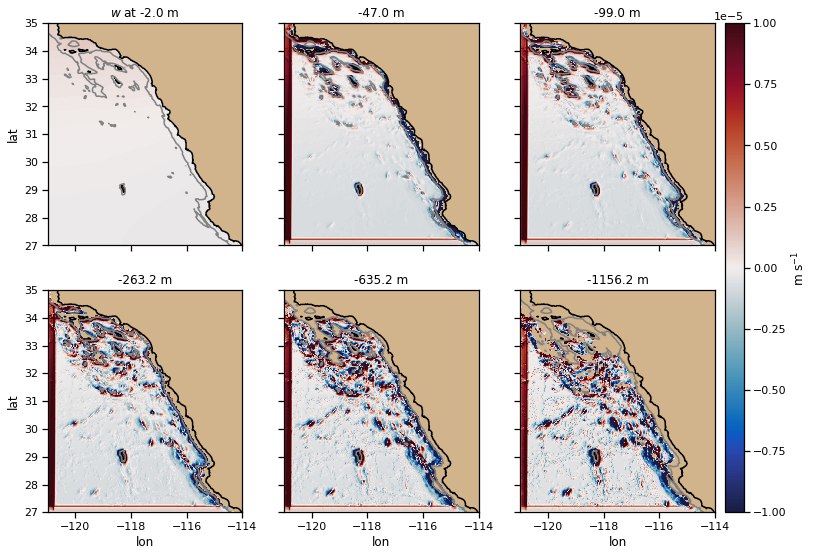

In [52]:
sns.set_context('notebook')
zz = 0
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600
ti = -1
W1b = ds['WVEL'][ti,zz,:,:]
W2b = ds['WVEL'][ti,zz2,:,:]
W3b = ds['WVEL'][ti,zz3,:,:]
W4b = ds['WVEL'][ti,zz4,:,:]
W5b = ds['WVEL'][ti,zz5,:,:]
W6b = ds['WVEL'][ti,zz6,:,:]

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(W1b,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance, vmin=-1E-5, vmax=1E-5)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(W2b,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-5, vmax=1E-5)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(W3b,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-5, vmax=1E-5)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(W4b,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-5, vmax=1E-5)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(W5b,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-5, vmax=1E-5)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(W6b,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,vmin=-1E-5, vmax=1E-5)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-1E-5, vmax=1E-5)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

ax3.set_xlabel('lon')
ax4.set_xlabel('lon')
ax5.set_xlabel('lon')
ax0.set_ylabel('lat')
ax3.set_ylabel('lat')

ax0.set_title(r'$w$ at %1.1f m'%(Zl[zz]))
ax1.set_title('%1.1f m'%(Zl[zz2]))
ax2.set_title('%1.1f m'%(Zl[zz3]))
ax3.set_title('%1.1f m'%(Zl[zz4]))
ax4.set_title('%1.1f m'%(Zl[zz5]))
ax5.set_title('%1.1f m'%(Zl[zz6]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
    ax.set_ylim(27,35)
    ax.set_xlim(-121,-114)
#plt.tight_layout()

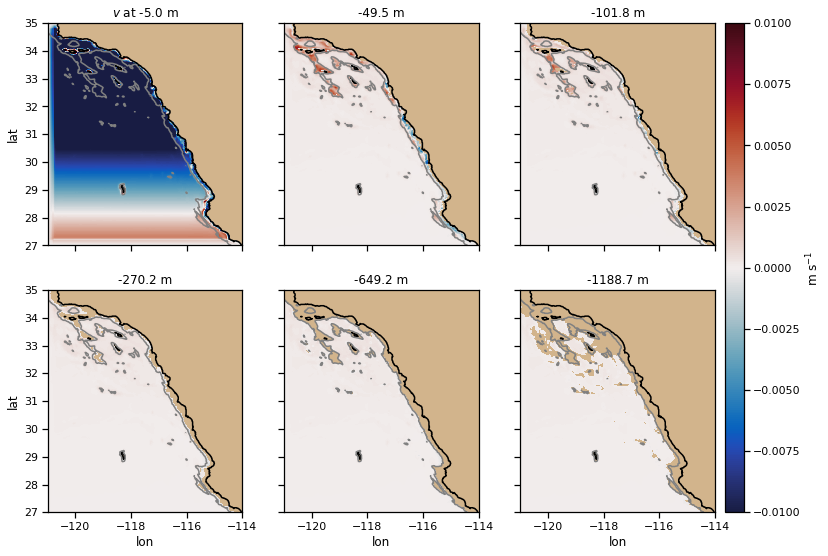

In [56]:
sns.set_context('notebook')
zz = 1
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600
ti = -1
V1b = ds['VVEL'][ti,zz,:,:]
V2b = ds['VVEL'][ti,zz2,:,:]
V3b = ds['VVEL'][ti,zz3,:,:]
V4b = ds['VVEL'][ti,zz4,:,:]
V5b = ds['VVEL'][ti,zz5,:,:]
V6b = ds['VVEL'][ti,zz6,:,:]

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(V1b,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(V2b,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(V3b,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(V4b,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(V5b,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-2, vmax=1E-2)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(V6b,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,vmin=-1E-2, vmax=1E-2)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-1E-2, vmax=1E-2)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

ax3.set_xlabel('lon')
ax4.set_xlabel('lon')
ax5.set_xlabel('lon')
ax0.set_ylabel('lat')
ax3.set_ylabel('lat')

ax0.set_title(r'$v$ at %1.1f m'%(Z[zz]))
ax1.set_title('%1.1f m'%(Z[zz2]))
ax2.set_title('%1.1f m'%(Z[zz3]))
ax3.set_title('%1.1f m'%(Z[zz4]))
ax4.set_title('%1.1f m'%(Z[zz5]))
ax5.set_title('%1.1f m'%(Z[zz6]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
    ax.set_ylim(27,35)
    ax.set_xlim(-121,-114)
#plt.tight_layout()

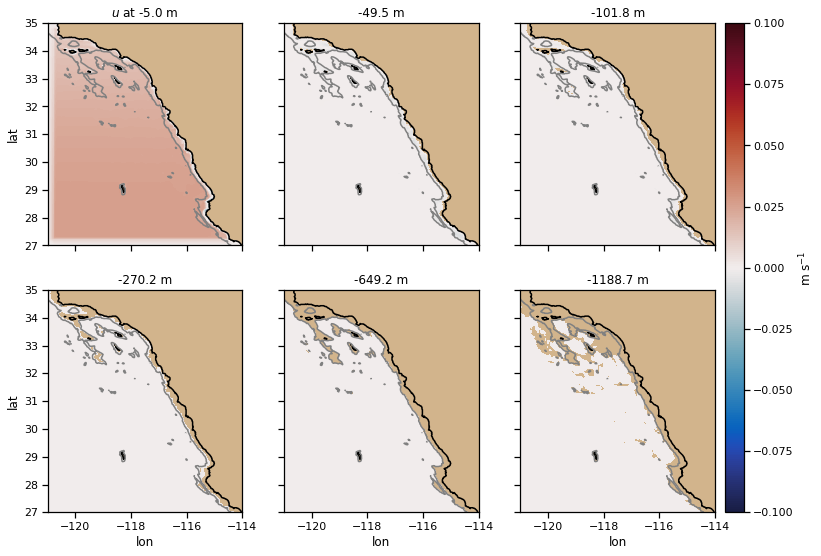

In [57]:
sns.set_context('notebook')
zz = 1
zz2 =15
zz3 = 25
zz4 = 43
zz5 = 60
zz6 = 70
tini = 24
dt = 600
ti = -1
U1b = ds['UVEL'][ti,zz,:,:]
U2b = ds['UVEL'][ti,zz2,:,:]
U3b = ds['UVEL'][ti,zz3,:,:]
U4b = ds['UVEL'][ti,zz4,:,:]
U5b = ds['UVEL'][ti,zz5,:,:]
U6b = ds['UVEL'][ti,zz6,:,:]

fig, ((ax0,ax1,ax2),(ax3,ax4,ax5)) = plt.subplots(2,3,figsize=(12,9), sharey=True, sharex=True)
ax0.set_facecolor('tan')
ax1.set_facecolor('tan')
ax2.set_facecolor('tan')
ax3.set_facecolor('tan')
ax4.set_facecolor('tan')
ax5.set_facecolor('tan')

pc = ax0.pcolormesh(lon,lat, np.ma.masked_array(U1b,mask=mask[zz,:,:]),
                   cmap=cmo.cm.balance, vmin=-1E-1, vmax=1E-1)
ax0.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax1.pcolormesh(lon,lat, np.ma.masked_array(U2b,mask=mask[zz2,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-1, vmax=1E-1)
ax1.contour(lon,lat,depth, levels=[0,500], colors=['k','0.5'])

pc = ax2.pcolormesh(lon,lat, np.ma.masked_array(U3b,mask=mask[zz3,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-1, vmax=1E-1)
ax2.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax3.pcolormesh(lon,lat, np.ma.masked_array(U4b,mask=mask[zz4,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-1, vmax=1E-1)
ax3.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax4.pcolormesh(lon,lat, np.ma.masked_array(U5b,mask=mask[zz5,:,:]),
                  cmap=cmo.cm.balance, vmin=-1E-1, vmax=1E-1)
ax4.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

pc = ax5.pcolormesh(lon,lat, np.ma.masked_array(U6b,mask=mask[zz6,:,:]),
                  cmap=cmo.cm.balance,vmin=-1E-1, vmax=1E-1)
ax5.contour(lon,lat,depth, levels=[0,500], colors=['k', '0.5'])

norm = mpl.colors.Normalize(vmin=-1E-1, vmax=1E-1)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical',label='m s$^{-1}$')

ax3.set_xlabel('lon')
ax4.set_xlabel('lon')
ax5.set_xlabel('lon')
ax0.set_ylabel('lat')
ax3.set_ylabel('lat')

ax0.set_title(r'$u$ at %1.1f m'%(Z[zz]))
ax1.set_title('%1.1f m'%(Z[zz2]))
ax2.set_title('%1.1f m'%(Z[zz3]))
ax3.set_title('%1.1f m'%(Z[zz4]))
ax4.set_title('%1.1f m'%(Z[zz5]))
ax5.set_title('%1.1f m'%(Z[zz6]))

for ax in [ax0,ax1,ax2,ax3,ax4,ax5]:
    ax.set_aspect(1)
    ax.set_ylim(27,35)
    ax.set_xlim(-121,-114)
#plt.tight_layout()